In [1]:
import matplotlib.pyplot as plt
import cv2

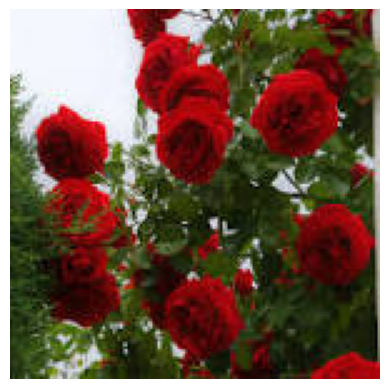

In [91]:
#Loading the image
image=cv2.imread("rose.jpeg")
rgb_img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.axis("off")
plt.show()

# Averaging Filter (Mean Blur)

Replace each pixel with the average of surrounding pixels.

Good for noise removal but blurs edges.

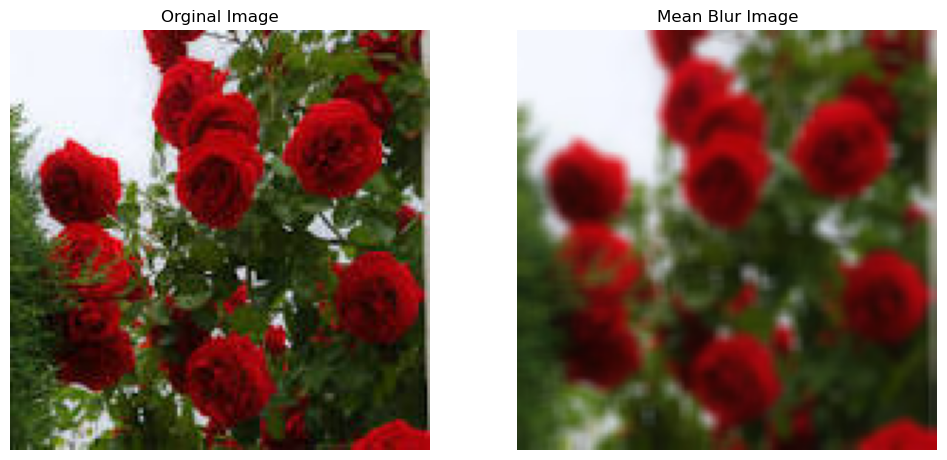

In [93]:
# Mean Blur
mean=cv2.blur(image,(5,5))

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(rgb_img)
plt.title("Orginal Image")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(cv2.cvtColor(mean,cv2.COLOR_BGR2RGB))
plt.title("Mean Blur Image")
plt.axis("off")
plt.show()

# Gaussian Blur

Weighted average using Gaussian distribution.

More natural blur (less distortion).

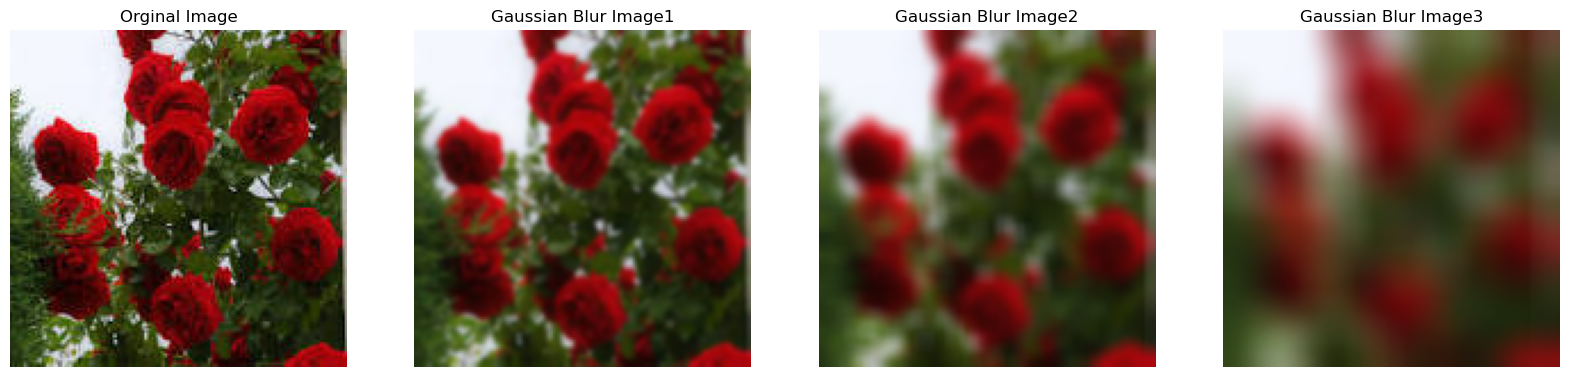

In [94]:
plt.figure(figsize=(20,16))
plt.subplot(1,4,1)
plt.imshow(rgb_img)
plt.title("Orginal Image")
plt.axis("off")

# Gaussian Blur
#cv2.GaussianBlur(src, ksize, sigmaX0) The kernel size must be odd and > 0
blur1 = cv2.GaussianBlur(image, (5,5), 0)   # auto sigma, smooth blur
blur2 = cv2.GaussianBlur(image, (9,9), 4)   # stronger blurv --> 4 the Gaussian function has a standard deviation of 4.
blur3 = cv2.GaussianBlur(image, (25,25), 10) # very strong blur

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(blur1,cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur Image1")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur Image2")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(blur3,cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur Image3")
plt.axis("off")
plt.show()

# Median Blur
Replace pixel with median of neighbors.  
Excellent for removing salt & pepper noise. (white and black dots)

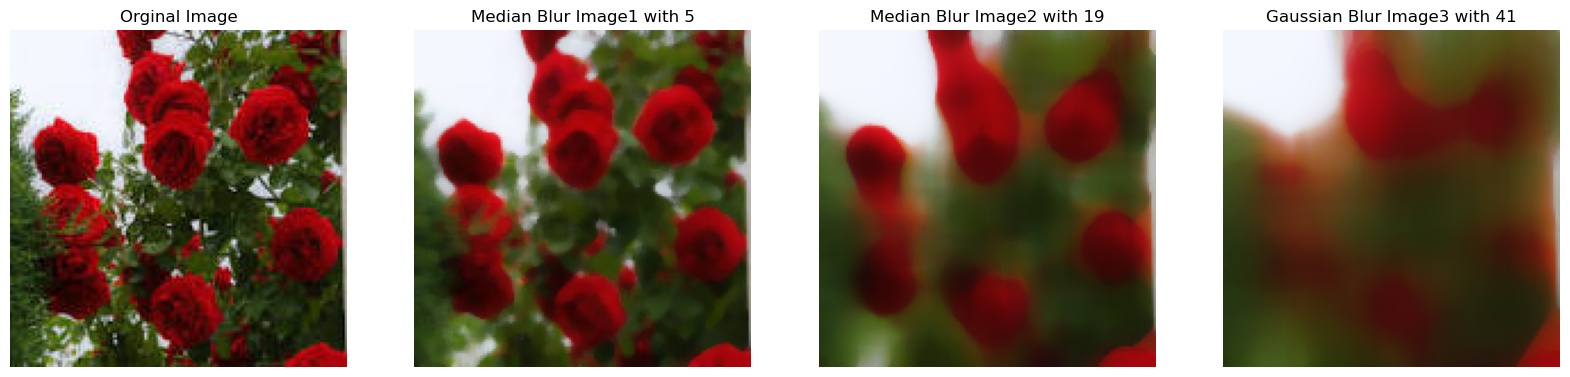

In [95]:

plt.figure(figsize=(20,16))
plt.subplot(1,4,1)
plt.imshow(rgb_img)
plt.title("Orginal Image")
plt.axis("off")

# Median Blur

blur1 = cv2.medianBlur(image,5) # Number must be odd   
blur2 = cv2.medianBlur(image, 19)   
blur3 = cv2.medianBlur(image,41) 

plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(blur1,cv2.COLOR_BGR2RGB))
plt.title("Median Blur Image1 with 5")
plt.axis("off")

plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.title("Median Blur Image2 with 19")
plt.axis("off")

plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(blur3,cv2.COLOR_BGR2RGB))
plt.title("Gaussian Blur Image3 with 41")
plt.axis("off")
plt.show()

# Bilateral Filter
Preserves edges while smoothing.  
Great for face/skin smoothing.

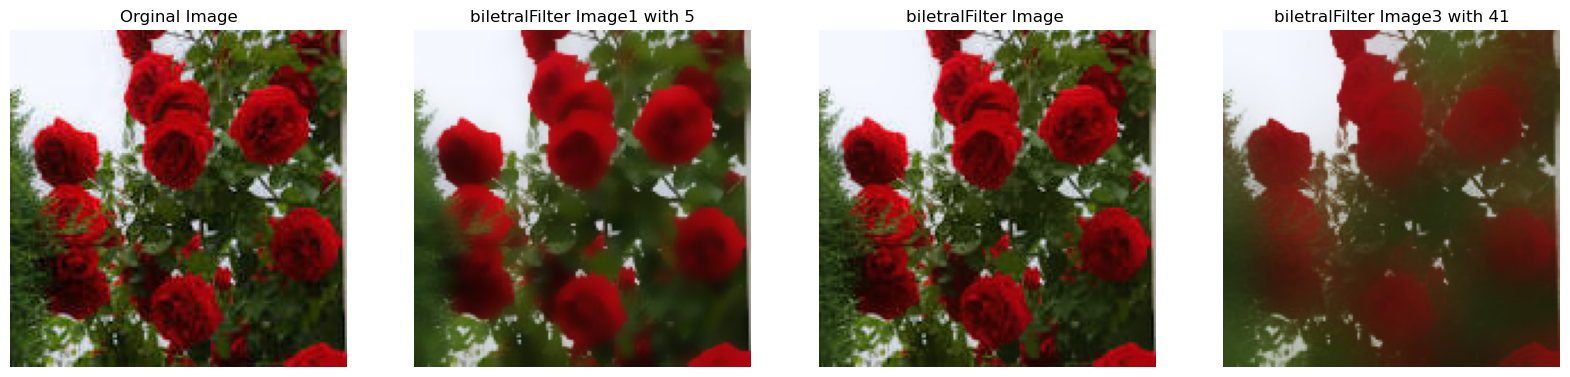

In [96]:
#cv2.bilateralFilter(src, Diameter, sigmaColor, sigmaSpace)
# Larger d → more pixels are considered → more smoothing (slower).

#sigmaColor → Range of color differences
#How much difference in color/intensity is allowed to be considered similar.
blur1 = cv2.bilateralFilter(image, 9, 75, 75)
# Stronger smoothing with bigger neighborhood
blur2 = cv2.bilateralFilter(image, 24, 15, 75)
# Very strong, can start to blur edges too
blur3 = cv2.bilateralFilter(image, 41, 150, 150)

plt.figure(figsize=(20,16))
plt.subplot(1,4,1);plt.imshow(rgb_img);plt.title("Orginal Image");plt.axis("off")

plt.subplot(1,4,2);plt.imshow(cv2.cvtColor(blur1,cv2.COLOR_BGR2RGB))
plt.title("biletralFilter Image1 with 5")
plt.axis("off")

plt.subplot(1,4,3) ;plt.imshow(cv2.cvtColor(blur2,cv2.COLOR_BGR2RGB))
plt.title("biletralFilter Image ")
plt.axis("off")

plt.subplot(1,4,4) ;plt.imshow(cv2.cvtColor(blur3,cv2.COLOR_BGR2RGB))
plt.title("biletralFilter Image3 with 41")
plt.axis("off")
plt.show()

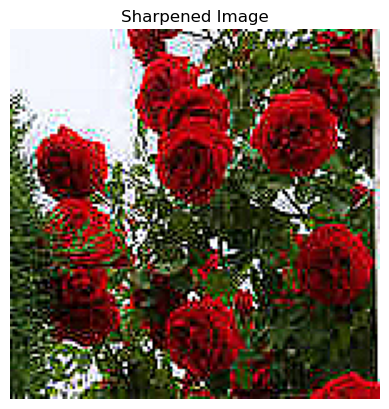

In [97]:
import numpy as np

# Sharpening kernel
kernel = np.array([[0,-1,0],
                   [-1,5,-1],
                   [0,-1,0]])

sharpened = cv2.filter2D(image, -1, kernel)

plt.imshow(cv2.cvtColor(sharpened, cv2.COLOR_BGR2RGB))
plt.title("Sharpened Image")
plt.axis("off")
plt.show()


# Image Cleaning

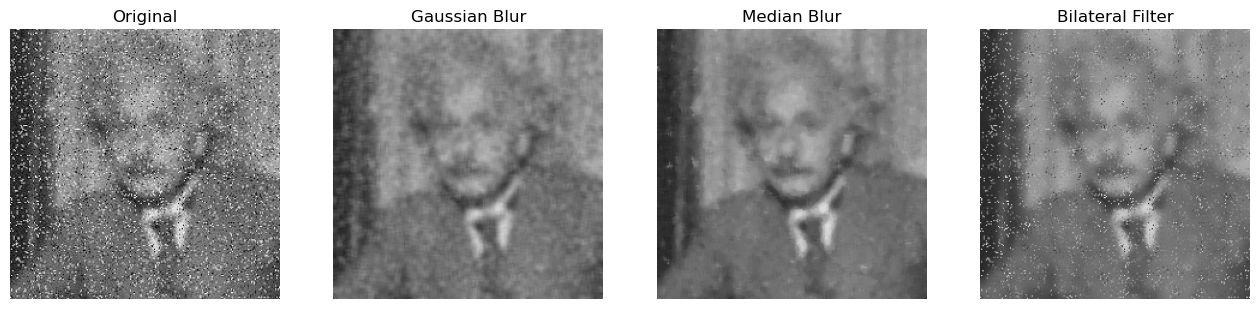

In [98]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (with noise)
img = cv2.imread("PepperNoise.jpeg")

# 1. Gaussian Blur
gauss = cv2.GaussianBlur(img, (5,5), 11)

# 2. Median Blur (good for salt & pepper)
median = cv2.medianBlur(img, 5)

# 3. Bilateral Filter (keeps edges sharp)
bilateral = cv2.bilateralFilter(img, 11, 150, 150)

# Show results
titles = ["Original", "Gaussian Blur", "Median Blur", "Bilateral Filter"]
images = [img, gauss, median, bilateral]

plt.figure(figsize=(16,18))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")
plt.show()


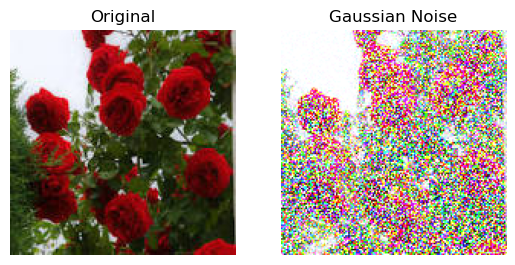

In [99]:
# Load clean image
img = cv2.imread("rose.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Add Gaussian noise
row, col, ch = img.shape
mean = 0
sigma = 25   # higher sigma = more noise
gauss = np.random.normal(mean, sigma, (row, col, ch)).astype(np.uint8)

# Add noise to image
noisy_gauss = cv2.add(img, gauss)

plt.subplot(1,2,1); plt.imshow(img); plt.title("Original"); plt.axis("off")
plt.subplot(1,2,2); plt.imshow(noisy_gauss); plt.title("Gaussian Noise"); plt.axis("off")
plt.show()


In [100]:
cv2.imwrite("NoisyGs.jpg",noisy_gauss)

True

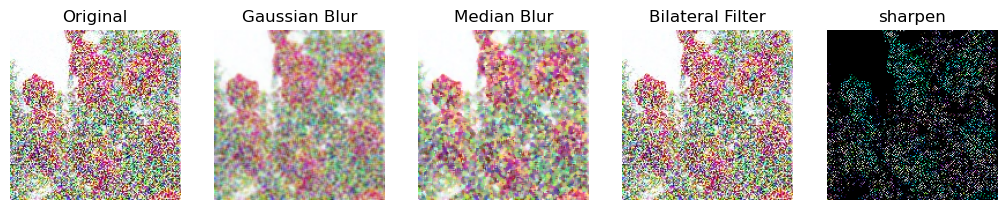

In [103]:
img=cv2.imread("NoisyGs.jpg")
#img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # Not Need because save the RGB image
BLClean=cv2.bilateralFilter(img,3,10,10)
GSClean=cv2.GaussianBlur(img,(3,3),3)
MedianClean=cv2.medianBlur(img,3)

# Sharpening kernel
kernel = np.array([[0,-1,0],
                   [-1,3,-1],
                   [0,-1,0]])
sharpen=cv2.filter2D(img,-1,kernel)


# Show results
titles = ["Original", "Gaussian Blur", "Median Blur", "Bilateral Filter","sharpen"]
images = [img, GSClean, MedianClean,BLClean,sharpen]


plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(1,7,i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")
plt.show()
    